# EDA - Exploration Data Analys About BankChurners Dataset
**Checklist:**
1.  Dữ liệu có bao nhiêu hàng, bao nhiêu cột?
2.  Ý nghĩa của mỗi hàng là gì?
3.  Có hàng nào bị trùng lặp không?
4.  Ý nghĩa của mỗi cột là gì?
5.  Kiểu dữ liệu hiện tại của mỗi cột là gì? Có cột nào có kiểu dữ liệu không phù hợp?
6.  Với mỗi cột SỐ: Phân phối, % missing, Min/Max, Bất thường?
7.  Với mỗi cột PHÂN LOẠI: Phân phối, % missing, Số lượng giá trị, Bất thường?

**Mục tiêu**:
- Đọc dữ liệu từ file CSV bằng NumPy
- Khám phá sơ bộ dữ liệu: shape, các cột, 10 dòng đầu
- Thống kê mô tả thủ công cho từng cột
- Phát hiện missing values và giá trị không hợp lệ

## Cài đặt và Tải thư viện
**Thêm thư mục src vào Python filepath để nó nhận các file module**

In [1]:
import sys
import os
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
import numpy as np 
import data_processing as dp
import visualization as vi

## Exploring Data

### Load Data
Chúng ta sử dụng hàm `load_data` từ `data_processing.py`. Hàm này sẽ:
1.  Đọc file CSV.
2.  Tạo một mảng có cấu trúc (structured array) với `dtype='U50'` (tất cả là chuỗi).
3.  Tự động làm sạch dấu ngoặc kép (`"`) trong tất cả các ô.

In [2]:
file_path = '../data/raw/BankChurners.csv'
data , header= dp.load_data(file_path)

### Phân tích tổng quan
- Kiểm tra kích thước của data
- Xem 10 dòng đầu của dữ liệu
- Đọc dữ liệu và quan sát sơ bộ
- Thống kê mô tả cho dữ liệu

### Kích thước của dữ liệu
- Dữ liệu có 10127 dòng và 23 cột

In [3]:
data.shape

(10127, 23)

### 10 dòng dầu dữ liệu và tạo một dictionary trỏ tới chỉ số của header
**Mục đích**: Việc tạo một dictionary trỏ tới chỉ số của header giúp ta dễ truy cập chỉ số của cột đó khi mà bộ data này có đên 23 cột khi (Trước xử lý)

In [4]:
#Xem tên các cột
print("\nTên các cột (header):")
print(header)
#Tạo từ dictionary để tra cứu chỉ số
col_to_index = {col_name: i for i, col_name in enumerate(header)}
print(f"10 dòng đầu của dữ liệu là:{data[:10]} ")


Tên các cột (header):
['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
10 dòng đầu của dữ liệu là:[['768805383' 'Existing Customer' '45' 'M' '3' 'High School' 'Married'
  '$60K - $80K' 'Blue' '39' '5' '1' '3' '12691' '777' '11914' '1.335'
  '1144' '42' '1.625' '0.061' '9.3448e-05' '0.99991']
 ['818770008' 'Existing Customer' '49' 'F' '5' 'Graduate' 'Single'
  'Les

**Ý nghĩa của mỗi hàng (row)?**

**Mỗi hàng biểu thị cho `một khách hàng duy nhất` của ngân hàng, cùng với các thông tin cá nhân, thông tin tài chính và lịch sử giao dịch của họ.**

**Ý nghĩa của mỗi cột (column)?**
* **CLIENTNUM**: (Định danh) ID duy nhất của khách hàng.
* **Attrition_Flag**: (Mục tiêu) `Existing Customer` (Khách hàng hiện tại) hoặc `Attrited Customer` (Khách hàng đã rời bỏ).
* **Customer_Age**: (Số) Tuổi của khách hàng.
* **Gender**: (Phân loại) Giới tính (`M`, `F`).
* **Dependent_count**: (Số) Số người phụ thuộc.
* **Education_Level**: (Phân loại) Trình độ học vấn (`Graduate`, `High School`, `Unknown`, ...).
* **Marital_Status**: (Phân loại) Tình trạng hôn nhân (`Married`, `Single`, `Unknown`, ...).
* **Income_Category**: (Phân loại) Mức thu nhập hàng năm (`$60K - $80K`, `Less than $40K`, `Unknown`, ...).
* **Card_Category**: (Phân loại) Loại thẻ (`Blue`, `Silver`, `Gold`, `Platinum`).
* **Months_on_book**: (Số) Thâm niên (số tháng) là khách hàng.
* **Total_Relationship_Count**: Số lượng sản phẩm hoặc dịch vụ mà khách hàng có tại ngân hàng
* **Month_Inactive_12_mon**: Số tháng trong 12 tháng gần nhất mà khách hàng không hoạt động
* **Total_Relationship_Count**: Số làn ngân hàng liên hệ khách hàng trong 12 tháng gần nhất
* **Credit_Limit**: (Số) Hạn mức tín dụng.
* **Total_Revolving_Bal**: Dư nợ quay vòng (Số tiền khách hàng chưa trả)
* **Avg_Open_To_Buy**: Số tiền còn có thể chi tiêu (Credit_Limit-Total_Revolving_Bal).
* **Total_Trans_Amt**: (Số) Tổng số tiền giao dịch trong 12 tháng qua.
* **Total_Trans_Ct**: (Số) Tổng số lượng giao dịch trong 12 tháng qua.
* **Avg_Utilization_Ratio**: (Số) Tỷ lệ sử dụng thẻ trung bình.

### KIỂM TRA MISSING VALUE(Bao nhiêu hàng/cột? Kiểu dữ liệu? Tỷ lệ Missing?)    

In [5]:
dp.numpy_info(data,header)

Entries: 10127
Columns: 23
------------------------------------------------------------
STT   Column                         Non-Null Count     Dtype
------------------------------------------------------------
 0    CLIENTNUM                      10127              int64
 1    Attrition_Flag                 10127              object
 2    Customer_Age                   10127              int64
 3    Gender                         10127              object
 4    Dependent_count                10127              int64
 5    Education_Level                8608               object
 6    Marital_Status                 9378               object
 7    Income_Category                9015               object
 8    Card_Category                  10127              object
 9    Months_on_book                 10127              int64
 10   Total_Relationship_Count       10127              int64
 11   Months_Inactive_12_mon         10127              int64
 12   Contacts_Count_12_mon          10

In [6]:
missing_values = {'', 'unknown', 'Unknown', 'NaN', 'nan', ' '}
mask_missing = np.vectorize(lambda x: x.strip().lower() in missing_values)(data) 

percent_missing_per_col = np.mean(mask_missing, axis=0) * 100

for name, percent in zip(header, percent_missing_per_col):
    print(f"{name:<30}:{percent:5.2f}% missing")

CLIENTNUM                     : 0.00% missing
Attrition_Flag                : 0.00% missing
Customer_Age                  : 0.00% missing
Gender                        : 0.00% missing
Dependent_count               : 0.00% missing
Education_Level               :15.00% missing
Marital_Status                : 7.40% missing
Income_Category               :10.98% missing
Card_Category                 : 0.00% missing
Months_on_book                : 0.00% missing
Total_Relationship_Count      : 0.00% missing
Months_Inactive_12_mon        : 0.00% missing
Contacts_Count_12_mon         : 0.00% missing
Credit_Limit                  : 0.00% missing
Total_Revolving_Bal           : 0.00% missing
Avg_Open_To_Buy               : 0.00% missing
Total_Amt_Chng_Q4_Q1          : 0.00% missing
Total_Trans_Amt               : 0.00% missing
Total_Trans_Ct                : 0.00% missing
Total_Ct_Chng_Q4_Q1           : 0.00% missing
Avg_Utilization_Ratio         : 0.00% missing
Naive_Bayes_Classifier_Attrition_F

**Nhận xét:**
- Dữ liệu có **10127** hàng và **23** cột
- **(% Missing):** Chúng ta thấy rõ các cột có "missing" (Unknown):
    - `Education_Level`: 8608 non-null (15.00% null)
    - `Marital_Status`: 9378 non-null (7.40% null)
    - `Income_Category`: 9015 non-null (10.98% null)
    - `CLIENTNUM`: Không có missing value nhưng nên xóa cột này đi vì không cần thiết ở đây, cột này có thể gây ra tình trạng **overfitting** khi đưa vào học máy , đồng thời cũng là vì việc bảo vệ thông tin cá nhân
    - `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1`: Không cần thiết , nên xóa
    - `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2`:không cần thiết nên xóa 

### Phân tích numerical data

#### Phân phối, Min/Max, Bất thường của các cột numerical data

In [7]:
dp.numpy_describe(data,header)

Statistics        CLIENTNUM Customer_Age Dependent_co Months_on_bo Total_Relati Months_Inact Contacts_Cou Credit_Limit Total_Revolv Avg_Open_To_ Total_Amt_Ch Total_Trans_ Total_Trans_ Total_Ct_Chn Avg_Utilizat Naive_Bayes_ Naive_Bayes_ 
--------------------------------------------------------------------------------
count              10127.00    10127.00    10127.00    10127.00    10127.00    10127.00    10127.00    10127.00    10127.00    10127.00    10127.00    10127.00    10127.00    10127.00    10127.00    10127.00    10127.00
mean           739177606.33       46.33        2.35       35.93        3.81        2.34        2.46     8631.95     1162.81     7469.14        0.76     4404.09       64.86        0.71        0.27        0.16        0.84
std_dev         36901961.36        8.02        1.30        7.99        1.55        1.01        1.11     9088.33      814.95     9090.24        0.22     3396.96       23.47        0.24        0.28        0.37        0.37
min            7080820

**Nhận xét về cột số**:
- **Tổng quan chung**
    - Dữ liệu của cột số gồm **10127 mẫu** cho nên không có missing value nào ở các cột số.
    - Cá giá trị nằm trong phạm vi hợp lý (Không có outliers nào quá lớn)
    - Một số cột max-min rất khá nhau -> Cho thấy các đặc trưng không đồng nhất về thang đo (cần chuẩn hóa/scaling nếu đưa vào mô hình ML)
- **Đặc trưng cá nhân**
    - `Customer_Age`: Tuổi trung bình của khách hàng là khoảng **46 tuổi**, `min-max(23-73)`->Ta thấy phân lớn khách hàng là người trưởng thành ở tuổi trung niên
    - `Dependent_Count`: Trung bình mỗi người có **2.35 ngừoi phụ thuộc**, **nhiều nhất** là 5 người. Dữ liệu này có vẻ không có gì bất thường
- **Đặc trưng quan hệ với ngân hàng**
    - `Months_on_book`: Trung bình khoảng 36 tháng (khoảng 3 năm), dao động từ 13-56 -> hâu hết khách hàng đã sử dụng thẻ lâu dài
    - `Total_Relationship_Count`: Trung bình 3.8 sản phẩm , tối đa 6-> khách hàng có mối quan hệ khá đa dạng với ngân hàng.
    - `Credit_Limit`: Trung bình **8,61** , **Q3= 11,067**, **max=34,516** -> chênh lệch khá lơn , có vài khách hàng có hạn mức rất cao.
    - `Total_Trans_Amt`: Trung bình **4,404** , **min=510 và max=18,484** -> Cho thấy khối lượng chi tiết của các khách hàng cũng khác nhau
- **Tổng kết**:
    - Không có missing values trong các cột số -> Dữ liệu sạch , không cần xử lý
    - Chênh lệch thang đo lơns -> Nên chuẩn hóa **(Standardlize/Normalize)** để về cũng một khoảng trước khi huấn luyện mô hình.
    - Phân phối khá hợp lý : Không có giá trị outliers nào bất thường

#### Trực quan hóa các phân phối 

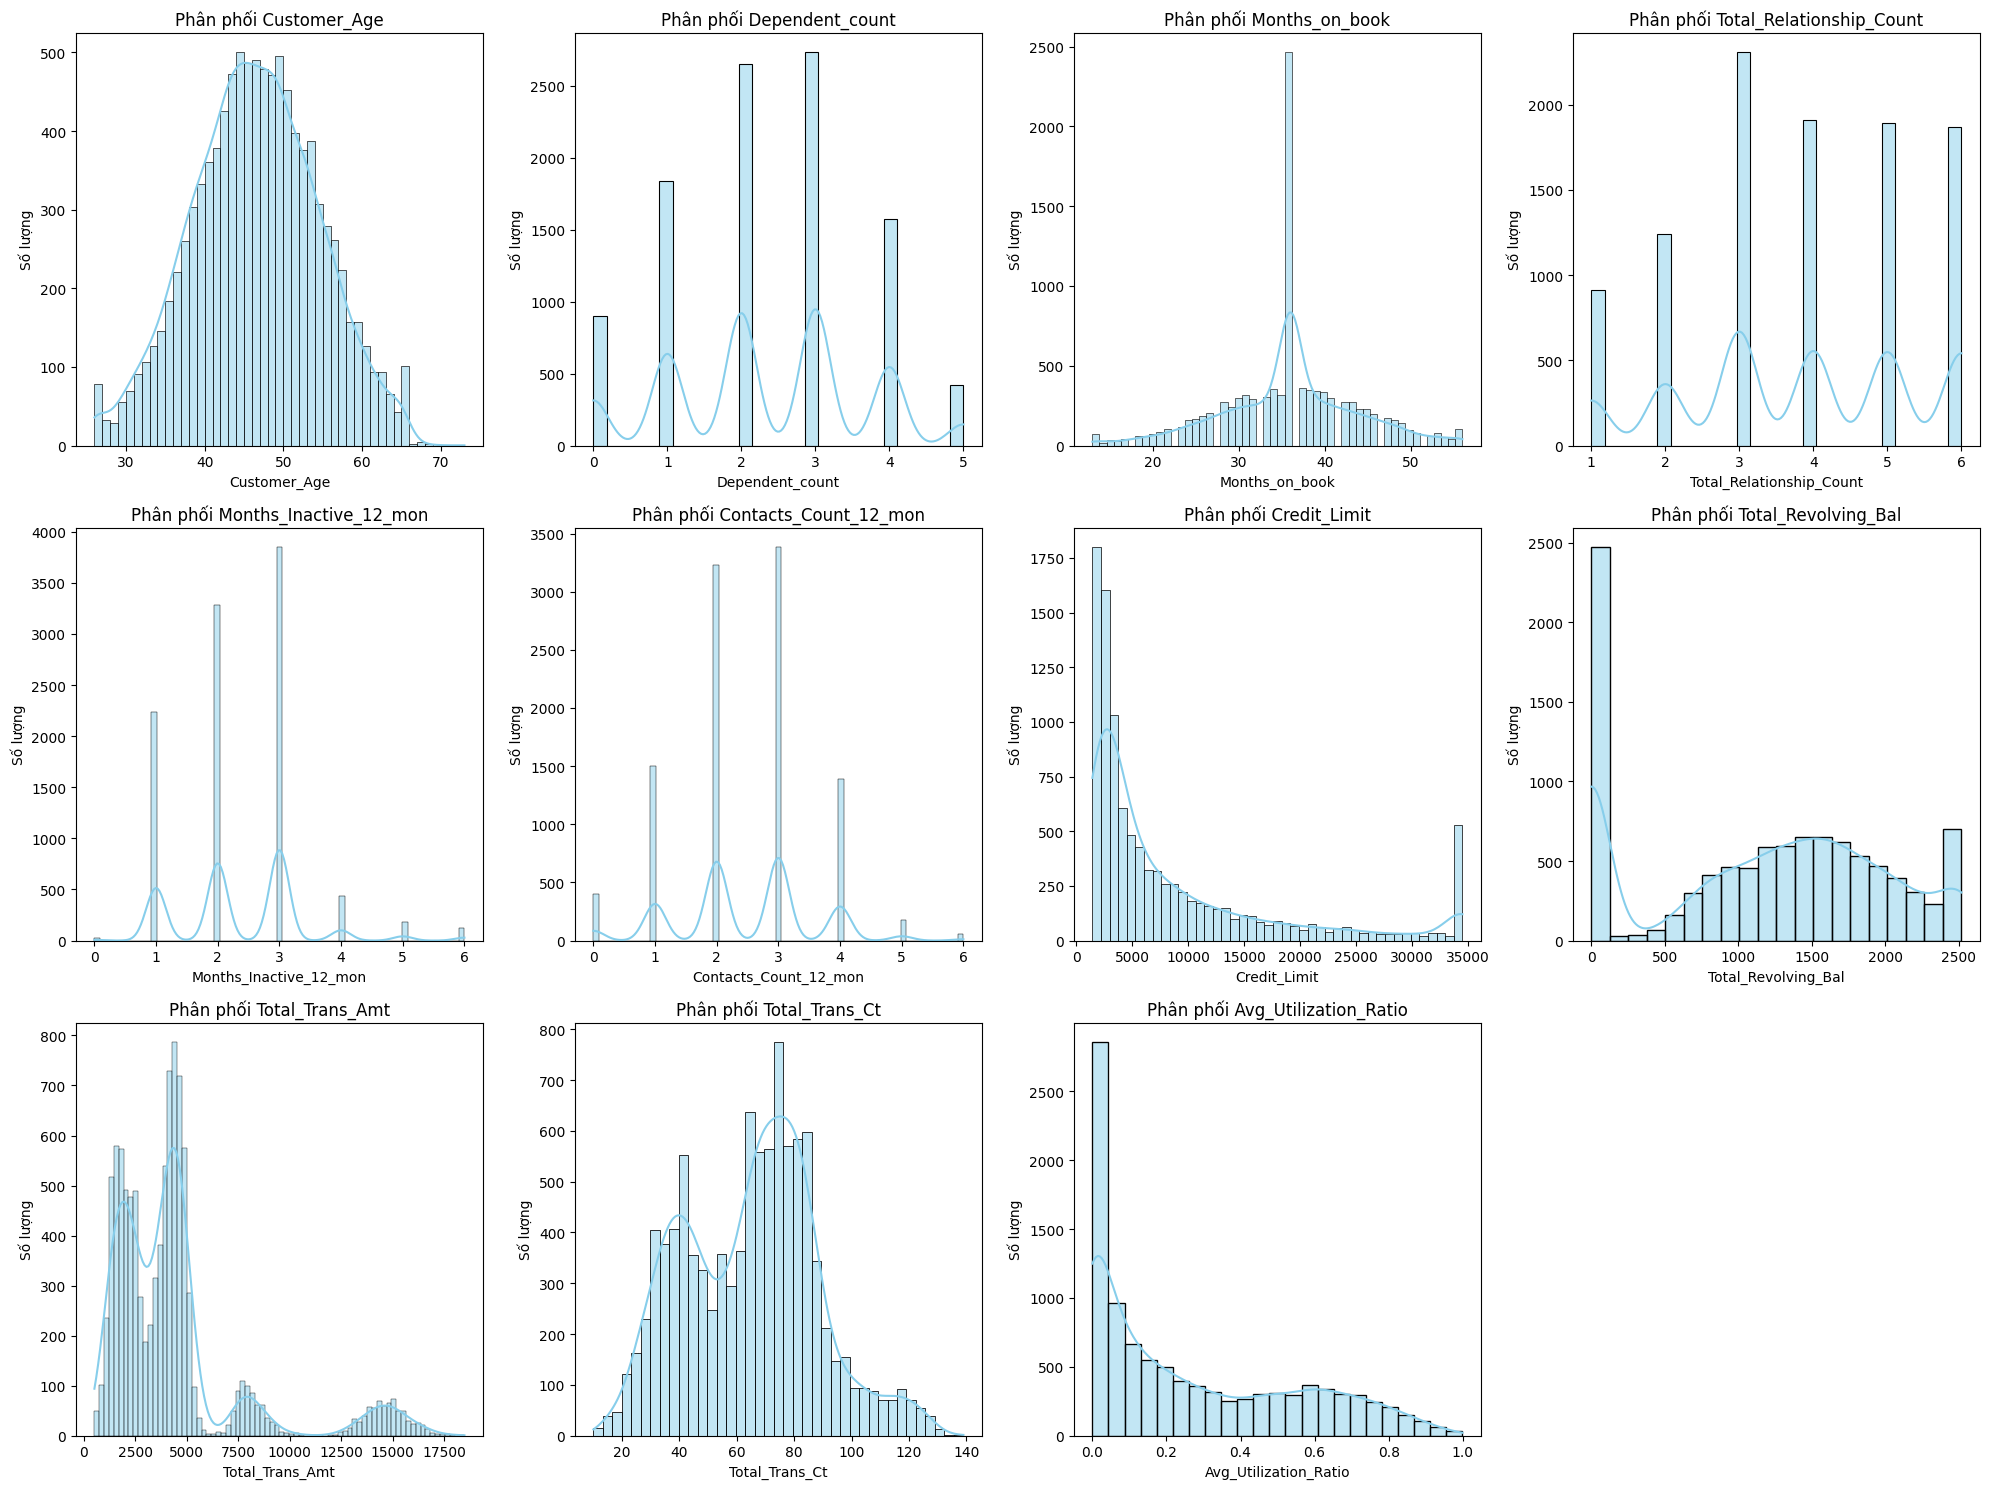

In [8]:
numerical_cols = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 
    'Total_Relationship_Count', 'Months_Inactive_12_mon', 
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio'
]

# Tạo lưới biểu đồ
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten() # Chuyển mảng 2D (3,4) thành mảng 1D (12,)

for i, col_name in enumerate(numerical_cols):
    # Lấy cột (dạng chuỗi)
    col = data[:, col_to_index[col_name]]
    
    col_float, null_mask = dp.get_valid_numerical_array(col)
    valid_col_float = col_float[~null_mask]
    
    # Vẽ biểu đồ
    ax = axes[i]
    vi.plot_numerical_distribution(valid_col_float, ax, 
                                    title=f'Phân phối {col_name}', 
                                    xlabel=col_name)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**Nhận xét:**
* **% Missing:** Tất cả các cột số này đều có 0% 'Unknown' (dựa trên `numpy_info` và `numpy_describe`).
* **Min/Max/Bất thường:**
    * Các giá trị Min/Max đều có vẻ hợp lý (ví dụ: `Customer_Age` từ 26 đến 73).
    * Không có giá trị âm bất thường.
* **Phân phối (Quan trọng):**
    * **Phân phối chuẩn (Normal-like):** `Customer_Age`, `Dependent_count`, `Months_on_book`, `Total_Relationship_Count`.
        * **Hành động:** Sử dụng **Standardization (Z-score)** (`dp.z_score_standardize`).
    * **Phân phối lệch (Skewed):** `Credit_Limit`, `Total_Revolving_Bal`, `Total_Trans_Amt`, `Avg_Utilization_Ratio` đều bị **lệch phải (right-skewed)**.
        * **Hành động:** Cần áp dụng **Log Transformation** (`dp.log_transform`) để điều chuẩn phân phối trước khi đưa vào mô hình.

### Phân tích tính tương quan của các cột

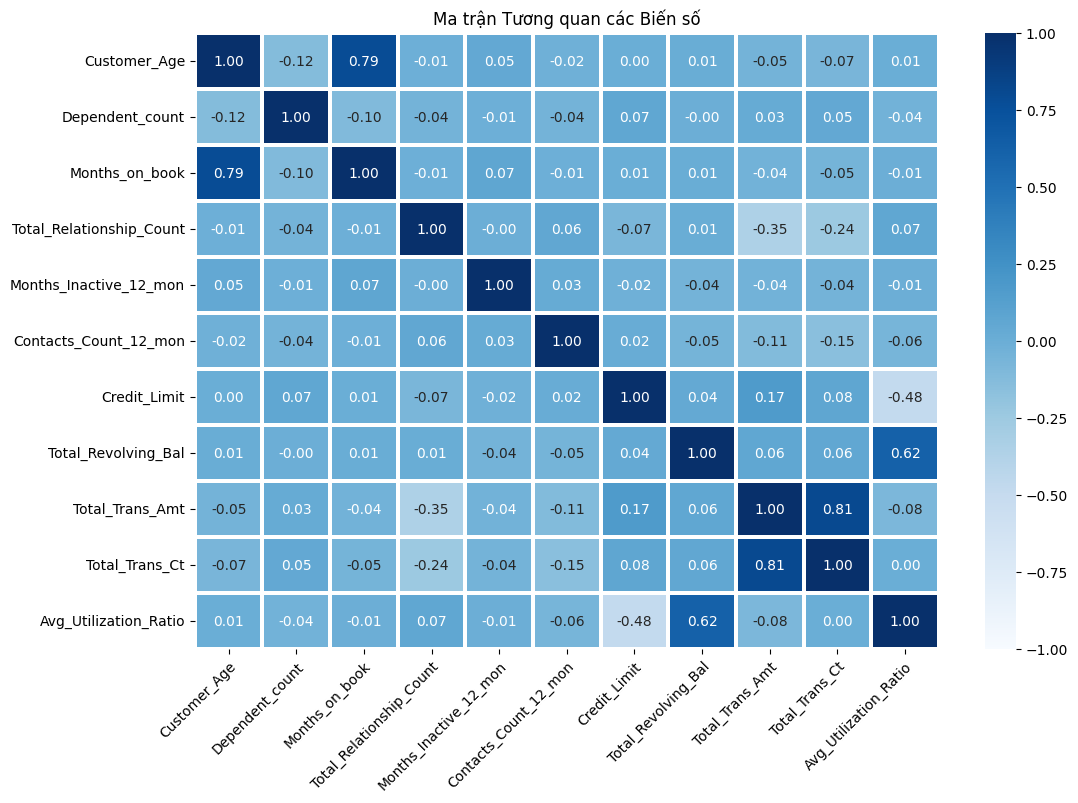

In [9]:
#Định nghĩa các cột số
numerical_col_names = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 
    'Total_Relationship_Count', 'Months_Inactive_12_mon', 
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio'
]
n_samples = data.shape[0]
n_features = len(numerical_col_names)
numerical_matrix = np.empty((n_samples, n_features), dtype=float)
for i, col_name in enumerate(numerical_col_names):
    #Lấy chỉ số của cột đó
    col_index = col_to_index[col_name]
    #trích xuất dữ liệu 
    numerical_matrix[:, i] = data[:, col_index].astype(float)

# Tính ma trận tương quan
corr_matrix = np.corrcoef(numerical_matrix, rowvar=False)
fig, ax = plt.subplots(figsize=(12,8))
vi.plot_correlation_heatmap(corr_matrix, ax, 
                             title='Ma trận Tương quan các Biến số', 
                             x_labels=numerical_col_names, 
                             y_labels=numerical_col_names)
plt.show()

**Nhận xét:**
- `Total_Trans_Amt` và `Total_Trans_Ct` là hai cột có **tương quan dương mạnh** (`0.81`)
- Tương tự, `Months_on_book` và `Customer_Age` cũng là hai cột có **tương quan dương mạnh** (`0.79`)
- Vì thế có thẻ xảy ra hiện **multicollinerity (Hiện tượng đa cộng tuyến)**. Nên cân nhắc để loại bỏ bớt một trong hai các cột có tương quan dương mạnh để tránh ảnh hưởng đến mô hình huấn luyện.

**Insight:**
- Khách hàng càng tiêu nhiều tiền `Total_Trans_Amt` thì đa số số lần thực hiện giao dịch cũng cần nhiều `Total_Trans_Ct` , số ít là chi nhiều tiền cho một lần.
- Khách hàng càng lớn tuổi `Customer_Age` thì họ sẽ có xu hướng gắn bó lâu dài hơn với dịch vụ `Months_on_book`. Điều này cũng hợp lý trong thực tế: những người trẻ tuổi có xu hướng linh hoạt hơn, dễ thay đổi nhà cung cấp dịch vụ, hoặc có thể họ chỉ mới bắt đầu sử dụng dịch vụ tài chính nói chung. Ngược lại, những khách hàng lớn tuổi hơn thường có thói quen ổn định hơn, ít thay đổi ngân hàng hoặc dịch vụ mà họ đã tin dùng trong nhiều năm.

### Phân tích Categorical Data

#### Kiểm tra các giá trị khác nhau của các cột phân loại

In [10]:
categorical_cols = [
    'Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category'
]
print("========Các giá trị khác nhau của các cột Categorical:========= ")
for i , col_name in enumerate(categorical_cols):
    #Lấy chỉ số index của tên cột tương ứng
    col = data[:,col_to_index[col_name]]
    #Một mảng boolean trả về các giá trị là missing value
    missing_mask = (np.char.lower(col) == 'unknown') | (np.char.strip(col) == '')
    #Tính số lượng các giá trị khác nhau của mỗi cột categorical cols
    unique_vals = np.unique(col[~missing_mask])
    num_unique_vals = len(unique_vals)
    print(f"{col_name:<15} : {num_unique_vals}")

========Các giá trị khác nhau của các cột Categorical:========= 
Attrition_Flag  : 2
Gender          : 2
Education_Level : 6
Marital_Status  : 3
Income_Category : 5
Card_Category   : 4


**Nhận xét**:
- `Attrition_Flag`: Có 2 giá trị khác nhau , đây là cột **target(Cần cho huấn luyện)** - khách hàng rời đi **(Attrited Customer)** hoặc ở lại **(Existing Customer)** -> Nên sử dụng `Label_Encoding` để chia làm 2 giá trị 0 và 1 tương ứng.
- `Gender`: Có 2 giá trị khác nhau, có 2 giá trị giới tính **(M:Male,F:Female)** -> Cũng chia làm 2 giá trị 0 và 1 tương ứng
- `Education_Level`: Có 6 giá trị khác nhau , các giá trị khá đa dạng **(High School, Graduate, Doctorate,...)** -> Cần xử lý
- `Marital_Status` và `Income_Category`: có 3 và 5  giá trị khác nhau -> có thể sử dụng `One-Hot Encoding`
- `Card_Category`: có 4 giá trị khác nhau , tương ứng **(Blue, Silver, Gold, Platinum)** -> Sử dụng `One-Hot Encoding` hoặc `Label_Encoding`

#### Kiểm tra Imbalance Data của cột Target `Attrition_Flag`
**Mục đích:** Giúp chúng ta có cái nhìn tổng quan về bộ dữ liệu -> Nếu bị mất cân bằng thì phải xử lý -> để mô hình không bị thiên vị

In [11]:
#Trích xuất tên cột và chỉ số cột đó
target = 'Attrition_Flag'
target_index = col_to_index[target]
target_col = data[:,target_index]
#Đếm số lượng giá trị khác nhau kèm số lần xuất hiện 
labels, counts = np.unique(target_col, return_counts=True)
print("====Kết quả phân tích====")
total_samples = len(target_col)
for i in range(len(labels)):
    label = labels[i]
    count = counts[i]
    percentage = (count/total_samples)*100
    print(f"{label} chiếm {percentage:.2f}%")


====Kết quả phân tích====
Attrited Customer chiếm 16.07%
Existing Customer chiếm 83.93%


**Kết luận**: Dữ liệu bị mất cân bằng nghiêm trọng , phải có giải pháp xử lý mất cân bằng dữ liệu như (SMOTE)

### Tổng kết EDA & Kế hoạch Tiền xử lý
1.  **Mã hóa Biến Mục tiêu:** Chuyển `Attrition_Flag` ('Existing', 'Attrited') thành (0, 1) bằng `dp.label_encode`.
2.  **Xử lý "Unknown":** Dùng `dp.fill_missing_categorical_with_mode` cho 3 cột `Education_Level`, `Marital_Status`.
3.  **Xem xét:** Cần phải xem xét lại cột `Income_Category` cột này khá nguy hiểm 
4.  **Biến đổi Dữ liệu lệch (Skewed):** Áp dụng `dp.log_transform` cho các cột lệch phải (`Credit_Limit`, `Total_Trans_Amt`, ...).
5.  **Chuẩn hóa (Scaling):** Áp dụng `dp.z_score_standardize` cho các cột số có phân phối chuẩn (`Customer_Age`, `Months_on_book`, ...).
6.  **Mã hóa Biến phân loại:** Áp dụng `dp.one_hot_encode` cho tất cả các cột phân loại đã được làm sạch.
7.  **Xử lý Mất cân bằng (Trong Modeling):** sử dụng SMOTE trong `03_modeling.ipynb`.